In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(version = "3.19")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'curl', 'data.table', 'httr2', 'MASS', 'Matrix', 'nlme', 'ps',
  'ragg', 'tinytex'



In [3]:
install.packages("locfit")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
if (!("limma" %in% installed.packages())) {
  # Install DESeq2
  BiocManager::install("limma", update = FALSE)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'limma'

also installing the dependency ‘statmod’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
if (!("edgeR" %in% installed.packages())) {
  # Install DESeq2
  BiocManager::install("edgeR", update = FALSE)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'edgeR'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
library("limma")
library("tidyverse")

In [7]:
set.seed(12345)

In [8]:
dip1 <- read.csv("iPSC 1.csv")
dip2 <- read.csv("iPSC 2.csv")
dip3 <- read.csv("iPSC 3.csv")
dip4 <- read.csv("iPSC 4.csv")
d131 <- read.csv("MN D13-1.csv")
d132 <- read.csv("MN D13-2.csv")
d133 <- read.csv("MN D13-3.csv")
d134 <- read.csv("MN D13-4.csv")
d201 <- read.csv("MN D20-1.csv")
d202 <- read.csv("MN D20-2.csv")
d203 <- read.csv("MN D20-3.csv")
d204 <- read.csv("MN D20-4.csv")
d271 <- read.csv("MN D27-1.csv")
d272 <- read.csv("MN D27-2.csv")
d273 <- read.csv("MN D27-3.csv")
d274 <- read.csv("MN D27-4.csv")

In [9]:
dip1_FPKM <- dip1$FPKM
dip2_FPKM <- dip2$FPKM
dip3_FPKM <- dip3$FPKM
dip4_FPKM <- dip4$FPKM
d131_FPKM <- d131$FPKM
d132_FPKM <- d132$FPKM
d133_FPKM <- d133$FPKM
d134_FPKM <- d134$FPKM
d201_FPKM <- d201$FPKM
d202_FPKM <- d202$FPKM
d203_FPKM <- d203$FPKM
d204_FPKM <- d204$FPKM
d271_FPKM <- d271$FPKM
d272_FPKM <- d272$FPKM
d273_FPKM <- d273$FPKM
d274_FPKM <- d274$FPKM

dip1 <- cbind(dip1, dip2_FPKM, dip3_FPKM, dip4_FPKM, d131_FPKM, d132_FPKM, d133_FPKM, d134_FPKM, 
             d201_FPKM, d202_FPKM, d203_FPKM, d204_FPKM, 
             d271_FPKM, d272_FPKM, d273_FPKM, d274_FPKM)

d131 <- cbind(d131, d132_FPKM, d133_FPKM, d134_FPKM, 
             d201_FPKM, d202_FPKM, d203_FPKM, d204_FPKM, 
             d271_FPKM, d272_FPKM, d273_FPKM, d274_FPKM)
glimpse(dip1)
glimpse(d131)

Rows: 63,225
Columns: 17
$ gene_short_name <chr> "OR4G4P", "FAM138A", "MIR1302-2HG", "MIR1302-2", "-", …
$ FPKM            <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ dip2_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ dip3_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0522256,…
$ dip4_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ d131_FPKM       <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.0171…
$ d132_FPKM       <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000,…
$ d133_FPKM       <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000,…
$ d134_FPKM       <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000,…
$ d201_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580,…
$ d202_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ d203_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827,…
$ d204_FPKM    

In [10]:
df <- data.frame(dip1["gene_short_name"], dip1["FPKM"], dip1["dip2_FPKM"], dip1["dip3_FPKM"], dip1["dip4_FPKM"], dip1["d131_FPKM"], dip1["d132_FPKM"], dip1["d133_FPKM"], dip1["d134_FPKM"], 
                 dip1["d201_FPKM"], dip1["d202_FPKM"], dip1["d203_FPKM"], dip1["d204_FPKM"], 
                 dip1["d271_FPKM"], dip1["d272_FPKM"], dip1["d273_FPKM"], dip1["d274_FPKM"])

dc <- data.frame(d131["gene_short_name"], d131["FPKM"], d131["d132_FPKM"], d131["d133_FPKM"], d131["d134_FPKM"], 
                 d131["d201_FPKM"], d131["d202_FPKM"], d131["d203_FPKM"], d131["d204_FPKM"], 
                 d131["d271_FPKM"], d131["d272_FPKM"], d131["d273_FPKM"], d131["d274_FPKM"])

dk <- data.frame(d131["gene_short_name"],d131["d201_FPKM"], d131["d202_FPKM"], d131["d203_FPKM"], d131["d204_FPKM"], 
                 d131["d271_FPKM"], d131["d272_FPKM"], d131["d273_FPKM"], d131["d274_FPKM"])

colnames(df) <- c("Gene", "iPSC_1", "iPSC_2", "iPSC_3", "iPSC_4", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")

colnames(dc) <- c("Gene", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")

colnames(dk) <- c("Gene", "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")

glimpse(dc)
glimpse(df)

Rows: 63,225
Columns: 13
$ Gene   <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM138A", "O…
$ MN13_1 <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.01718860, 0.0…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000, 0.027586…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000, 0.289374…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580, 0.000000…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827, 0.063394…
$ MN20_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_1 <dbl> 0.0401068, 0.1911110, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_2 <dbl> 0.0118849, 0.0000000, 0.0000000, 0.1276030, 0.0000000, 0.433228…
$ MN27_3 <dbl> 0.18764800, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.0…
$ MN27_4 <dbl> 

In [11]:
dc <- subset(dc, Gene != "-")
dc <- dc[!duplicated(dc[c("Gene")]), ]
glimpse(dc)

df <- subset(df, Gene != "-")
df <- df[!duplicated(df[c("Gene")]), ]
glimpse(df)

dk <- subset(dk, Gene != "-")
dk <- dk[!duplicated(dk[c("Gene")]), ]
glimpse(dk)

Rows: 41,023
Columns: 13
$ Gene   <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM138A", "O…
$ MN13_1 <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.01718860, 0.0…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000, 0.027586…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000, 0.289374…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580, 0.000000…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827, 0.063394…
$ MN20_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_1 <dbl> 0.0401068, 0.1911110, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_2 <dbl> 0.0118849, 0.0000000, 0.0000000, 0.1276030, 0.0000000, 0.433228…
$ MN27_3 <dbl> 0.1876480, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_4 <dbl> 

In [12]:
x <- c("MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
y <- c("iPSC_1", "iPSC_2", "iPSC_3", "iPSC_4", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
z <- c("MN20_1", "MN20_2", "MN20_3", "MN20_4", "MN27_1", "MN27_2", "MN27_3", "MN27_4")

fac <- factor(substring(x, 1, 4))
fact <- factor(substring(y, 1, 4))
facto <- factor(substring(z, 1, 4))

print(fac)
print(fact)
print(facto)

 [1] MN13 MN13 MN13 MN13 MN20 MN20 MN20 MN20 MN27 MN27 MN27 MN27
Levels: MN13 MN20 MN27
 [1] iPSC iPSC iPSC iPSC MN13 MN13 MN13 MN13 MN20 MN20 MN20 MN20 MN27 MN27 MN27
[16] MN27
Levels: iPSC MN13 MN20 MN27
[1] MN20 MN20 MN20 MN20 MN27 MN27 MN27 MN27
Levels: MN20 MN27


In [13]:
rownames(dc) <- NULL
pm <- dc %>% 
column_to_rownames("Gene") %>%
as.matrix()

rownames(df) <- NULL
pc <- df %>% 
column_to_rownames("Gene") %>%
as.matrix()

rownames(dk) <- NULL
px <- dk %>% 
column_to_rownames("Gene") %>%
as.matrix()

In [14]:
glimpse(pm)
glimpse(pc)
glimpse(px)

 num [1:41023, 1:12] 0 0 0.1234 0 0.0172 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:12] "MN13_1" "MN13_2" "MN13_3" "MN13_4" ...
 num [1:41023, 1:16] 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "OR4G4P" "FAM138A" "MIR1302-2HG" "MIR1302-2" ...
  ..$ : chr [1:16] "iPSC_1" "iPSC_2" "iPSC_3" "iPSC_4" ...
 num [1:41023, 1:8] 0 0 0 0 0.126 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:8] "MN20_1" "MN20_2" "MN20_3" "MN20_4" ...


In [15]:
head(pm)
head(pc)

,MN13_1,MN13_2,MN13_3,MN13_4,MN20_1,MN20_2,MN20_3,MN20_4,MN27_1,MN27_2,MN27_3,MN27_4
MIR1302-2HG,0.0000000,0.0529516,0.0336902,0.0000000,0.000000,0,0.0000000,0,0.0401068,0.0118849,0.187648,0
MIR1302-2,0.0000000,0.0520208,0.0000000,0.0000000,0.000000,0,0.0000000,0,0.1911110,0.0000000,0.000000,0
DDX11L2,0.1234380,0.0000000,0.0167614,0.1537640,0.000000,0,0.0000000,0,0.0000000,0.0000000,0.000000,0
DDX11L1,0.0000000,0.0000000,0.0000000,0.0469125,0.000000,0,0.0000000,0,0.0000000,0.1276030,0.000000,0
FAM138A,0.0171886,0.0000000,0.0000000,0.0000000,0.126058,0,0.0500827,0,0.0000000,0.0000000,0.000000,0
OR4G4P,0.0000000,0.0000000,0.0275869,0.2893740,0.000000,0,0.0633945,0,0.0000000,0.4332280,0.000000,0


,iPSC_1,iPSC_2,iPSC_3,iPSC_4,MN13_1,MN13_2,MN13_3,MN13_4,MN20_1,MN20_2,MN20_3,MN20_4,MN27_1,MN27_2,MN27_3,MN27_4
OR4G4P,0,0,0.000000,0,0.0000000,0.0529516,0.0336902,0.0000000,0.0000000,0,0.0000000,0,0.0401068,0.0118849,0.1876480,0
FAM138A,0,0,0.000000,0,0.0000000,0.0520208,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.1911110,0.0000000,0.0000000,0
MIR1302-2HG,0,0,0.000000,0,0.1234380,0.0000000,0.0167614,0.1537640,0.0000000,0,0.0000000,0,0.0000000,0.0000000,0.0000000,0
MIR1302-2,0,0,0.000000,0,0.0000000,0.0000000,0.0000000,0.0469125,0.0000000,0,0.0000000,0,0.0000000,0.1276030,0.0000000,0
OR4G11P,0,0,0.000000,0,0.0000000,0.0000000,0.0275869,0.2893740,0.0000000,0,0.0633945,0,0.0000000,0.4332280,0.0000000,0
DDX11L2,0,0,0.163519,0,0.0991514,0.2264560,0.1945570,0.0000000,0.0386874,0,0.0000000,0,0.2463820,0.0000000,0.0800287,0


In [16]:

pm <- pm[complete.cases(pm), ]
pm <- pm[, colSums(is.na(pm)) == 0]
glimpse(pm)


pc <- pc[complete.cases(pc), ]
pc <- pc[, colSums(is.na(pc)) == 0]
glimpse(pc)

px <- px[complete.cases(px), ]
px <- px[, colSums(is.na(px)) == 0]
glimpse(px)

 num [1:41023, 1:12] 0 0 0.1234 0 0.0172 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:12] "MN13_1" "MN13_2" "MN13_3" "MN13_4" ...
 num [1:41023, 1:16] 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "OR4G4P" "FAM138A" "MIR1302-2HG" "MIR1302-2" ...
  ..$ : chr [1:16] "iPSC_1" "iPSC_2" "iPSC_3" "iPSC_4" ...
 num [1:41023, 1:8] 0 0 0 0 0.126 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:8] "MN20_1" "MN20_2" "MN20_3" "MN20_4" ...


In [17]:
library(edgeR)

LCPM <- cpm(pm, log=TRUE, prior.count = 3)
glimpse(LCPM)

LogCPM <- cpm(pc, log=TRUE, prior.count = 3)
glimpse(LogCPM)

LLCPM <- cpm(px, log=TRUE, prior.count = 3)
glimpse(LLCPM)

 num [1:41023, 1:12] 3.82 3.82 3.85 3.82 3.82 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:12] "MN13_1" "MN13_2" "MN13_3" "MN13_4" ...
 num [1:41023, 1:16] 3.51 3.51 3.51 3.51 3.51 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "OR4G4P" "FAM138A" "MIR1302-2HG" "MIR1302-2" ...
  ..$ : chr [1:16] "iPSC_1" "iPSC_2" "iPSC_3" "iPSC_4" ...
 num [1:41023, 1:8] 3.71 3.71 3.71 3.71 3.74 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:8] "MN20_1" "MN20_2" "MN20_3" "MN20_4" ...


In [18]:
ff <- factor(c(rep("MN13", 4), rep("MN20", 4), rep("MN27", 4)))
fc <- factor(c(rep("iPSC", 4), rep("MN13", 4), rep("MN20", 4), rep("MN27", 4)))
fx <- factor(c(rep("MN20", 4), rep("MN27", 4)))

samples <- data.frame(
  sampleID = colnames(pm),
  group = ff)

is.data.frame(samples)

print(samples)

Sample <- data.frame(
  samplesID = colnames(pc),
  groups = fc)

is.data.frame(Sample)

print(Sample)

SAmples <- data.frame(
  sampledID = colnames(px),
  groupt = fx)

is.data.frame(SAmples)

design <- model.matrix(~group, data = samples)
colnames(design) <- c("MN13", "MN20", "MN27")
print(design)

design1 <- model.matrix(~groups, data = Sample)
colnames(design1) <- c("iPSC", "MN13", "MN20", "MN27")
print(design1)

design2 <- model.matrix(~groupt, data = SAmples)
colnames(design2) <- c("MN20", "MN27")
print(design2)

[1] TRUE

   sampleID group
1    MN13_1  MN13
2    MN13_2  MN13
3    MN13_3  MN13
4    MN13_4  MN13
5    MN20_1  MN20
6    MN20_2  MN20
7    MN20_3  MN20
8    MN20_4  MN20
9    MN27_1  MN27
10   MN27_2  MN27
11   MN27_3  MN27
12   MN27_4  MN27


[1] TRUE

   samplesID groups
1     iPSC_1   iPSC
2     iPSC_2   iPSC
3     iPSC_3   iPSC
4     iPSC_4   iPSC
5     MN13_1   MN13
6     MN13_2   MN13
7     MN13_3   MN13
8     MN13_4   MN13
9     MN20_1   MN20
10    MN20_2   MN20
11    MN20_3   MN20
12    MN20_4   MN20
13    MN27_1   MN27
14    MN27_2   MN27
15    MN27_3   MN27
16    MN27_4   MN27


[1] TRUE

   MN13 MN20 MN27
1     1    0    0
2     1    0    0
3     1    0    0
4     1    0    0
5     1    1    0
6     1    1    0
7     1    1    0
8     1    1    0
9     1    0    1
10    1    0    1
11    1    0    1
12    1    0    1
attr(,"assign")
[1] 0 1 1
attr(,"contrasts")
attr(,"contrasts")$group
[1] "contr.treatment"

   iPSC MN13 MN20 MN27
1     1    0    0    0
2     1    0    0    0
3     1    0    0    0
4     1    0    0    0
5     1    1    0    0
6     1    1    0    0
7     1    1    0    0
8     1    1    0    0
9     1    0    1    0
10    1    0    1    0
11    1    0    1    0
12    1    0    1    0
13    1    0    0    1
14    1    0    0    1
15    1    0    0    1
16    1    0    0    1
attr(,"assign")
[1] 0 1 1 1
attr(,"contrasts")
attr(,"contrasts")$groups
[1] "contr.treatment"

  MN20 MN27
1    1    0
2    1    0
3    1    0
4    1    0
5    1    1
6    1    1
7    1    1
8    1    1
attr(,"assign")
[1] 0 1
attr(,"contrasts")
attr(,"contrasts")$groupt
[1] "cont

In [19]:
cont_Matrix <- makeContrasts(M13vM20 = MN13-MN20, M13vM27 = MN13-MN27, levels = design)
cont_Matrix1 <- makeContrasts(iPSCvMN13 = iPSC-MN13, iPSCvM20 = iPSC-MN20, iPSCvM27 = iPSC-MN27, levels = design1)

In [55]:
fit <- lmFit(LCPM, design)
fit1 <- lmFit(LogCPM, design1)
fit2 <- lmFit(LLCPM, design2)

In [56]:
fit_cont <- contrasts.fit(fit, cont_Matrix)
fit_cont1 <- contrasts.fit(fit1, cont_Matrix1)
fit_cont2 <- contrasts.fit(fit2, cont_Matrix1)

ERROR: Error in contrasts.fit(fit2, cont_Matrix1): Number of rows of contrast matrix must match number of coefficients in fit


In [57]:
fit <- eBayes(fit, trend = TRUE)
fit1 <- eBayes(fit1, trend = TRUE)
fit2 <- eBayes(fit2, trend = TRUE)

In [63]:
topTable(fit, coef=2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ASAH2B,-0.21613614,3.900467,-7.874613,8.753207e-06,0.3563758,-3.695418
EEF1G,-3.01563512,5.570241,-7.281971,1.795103e-05,0.3563758,-3.722007
GTF2I,-1.98608222,4.584236,-6.986981,2.606166e-05,0.3563758,-3.737172
LINC02123,-0.09602388,3.857201,-6.408199,5.589411e-05,0.5732361,-3.771409
LINC02065,-0.20939920,3.893695,-5.847631,1.220541e-04,0.6766921,-3.811366
ZNF287,-0.18929973,3.891992,-5.654068,1.614450e-04,0.6766921,-3.826997
RNASEH2C,-1.13696393,4.260204,-5.623569,1.687999e-04,0.6766921,-3.829555
HACD1,-0.92389457,4.519984,-5.584860,1.786529e-04,0.6766921,-3.832839
GPC3,-0.29085530,3.927043,-5.557134,1.860860e-04,0.6766921,-3.835218


In [64]:
topTable(fit, coef=3)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTF2I,-2.0609958,4.584236,-7.250525,1.866950e-05,0.4094059,-3.526951
RN7SKP1,2.1086206,4.689159,7.163369,2.082756e-05,0.4094059,-3.532424
ASAH2B,-0.1888180,3.900467,-6.879315,2.993973e-05,0.4094059,-3.551332
EEF1G,-2.6816385,5.570241,-6.475456,5.103857e-05,0.4777680,-3.581326
SNORA66,-4.2668441,5.537995,-6.193249,7.503195e-05,0.4777680,-3.604733
GPR199P,1.9380181,4.546359,6.160531,7.851389e-05,0.4777680,-3.607589
GPC3,-0.3070189,3.927043,-5.865958,1.188964e-04,0.4777680,-3.634741
RNASEH2C,-1.1851535,4.260204,-5.861921,1.195844e-04,0.4777680,-3.635132
KBTBD6,-0.3379145,3.954073,-5.847584,1.220623e-04,0.4777680,-3.636524


In [60]:
topTable(fit1, coef=2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RN7SK,-12.1075364,7.010828,-22.25389,3.133500e-12,7.164357e-08,14.49206
COX7A2,-4.2650894,4.607614,-22.07541,3.492849e-12,7.164357e-08,14.44171
FOXD3-AS1,-5.1196531,4.896084,-21.41617,5.254365e-12,7.184994e-08,14.24834
H2AC21,-5.3230812,5.248753,-20.11142,1.222481e-11,1.253746e-07,13.82830
VPS13B,-0.4223723,3.612452,-17.43463,8.221371e-11,6.745306e-07,12.77984
HDAC2,-3.3436384,4.404864,-15.80644,3.003902e-10,2.053818e-06,11.98831
H2AC20,-6.9709380,5.501754,-15.12681,5.348687e-10,3.084435e-06,11.61589
POLR1D,-2.8109504,4.238065,-14.99176,6.015035e-10,3.084435e-06,11.53862
IPO4,-2.2555130,4.070737,-14.41391,1.004909e-09,4.580485e-06,11.19508


In [61]:
topTable(fit1, coef=3)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RN7SK,-12.2822823,7.010828,-22.57508,2.582729e-12,9.722116e-08,14.44511
COX7A2,-4.1695218,4.607614,-21.58077,4.739837e-12,9.722116e-08,14.16831
FOXD3-AS1,-4.9969441,4.896084,-20.90286,7.281398e-12,9.956826e-08,13.96417
H2AC21,-5.3798058,5.248753,-20.32574,1.060465e-11,1.087586e-07,13.77964
VPS13B,-0.4223723,3.612452,-17.43463,8.221371e-11,6.745306e-07,12.67935
HDAC2,-3.3619365,4.404864,-15.89294,2.795716e-10,1.911477e-06,11.94555
POLR1D,-2.7966732,4.238065,-14.91561,6.429360e-10,3.767880e-06,11.41441
H2AC20,-6.6822535,5.501754,-14.50037,9.295559e-10,4.580485e-06,11.17123
IPO4,-2.2555130,4.070737,-14.41391,1.004909e-09,4.580485e-06,11.11919


In [62]:
topTable(fit1, coef=4)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RN7SK,-12.0334754,7.010828,-22.11777,3.403748e-12,8.195973e-08,14.65179
COX7A2,-4.2227244,4.607614,-21.85614,3.995794e-12,8.195973e-08,14.57430
H2AC21,-5.4429345,5.248753,-20.56425,9.067643e-12,1.239940e-07,14.16297
FOXD3-AS1,-4.8051157,4.896084,-20.10042,1.231483e-11,1.262979e-07,14.00272
VPS13B,-0.4223723,3.612452,-17.43463,8.221371e-11,6.745306e-07,12.92866
HDAC2,-3.3818307,4.404864,-15.98698,2.586742e-10,1.768598e-06,12.21429
H2AC20,-7.2109241,5.501754,-15.64758,3.430623e-10,2.010492e-06,12.03090
POLR1D,-2.8441486,4.238065,-15.16881,5.157905e-10,2.644909e-06,11.76095
IPO4,-2.2555130,4.070737,-14.41391,1.004909e-09,4.580485e-06,11.30671


In [65]:
topTable(fit2, coef=2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL7,3.5639209,5.686523,8.327328,4.405508e-05,0.9188236,-4.121455
MIR6855,-1.6935810,4.570411,-6.504119,2.339015e-04,0.9188236,-4.155791
CDK11A,1.3499299,4.383810,6.497149,2.355524e-04,0.9188236,-4.155968
RPS6,4.2231179,5.828398,6.476816,2.404435e-04,0.9188236,-4.156487
SHC1,1.9461428,4.914735,6.424676,2.535095e-04,0.9188236,-4.157836
HACD1,1.1283010,4.311482,6.021024,3.859984e-04,0.9188236,-4.169197
RN7SKP1,2.2338233,4.970417,6.008129,3.913442e-04,0.9188236,-4.169589
SPATS2L,-1.8470607,4.658607,-5.489614,6.923188e-04,0.9188236,-4.187055
NUDT13,0.1468638,3.796176,5.309909,8.506260e-04,0.9188236,-4.193976


In [33]:
fit <- lmFit(LCPM, design)
fit <- treat(fit, lfc=log2(1.2), trend=TRUE)
f <- topTreat(fit, coef=ncol(design))

In [34]:
fit1 <- lmFit(LogCPM, design1)
fit1 <- treat(fit1, lfc=log2(1.2), trend=TRUE)
f1<- topTreat(fit1, coef=ncol(design1))
f1
print(f1["logFC"])

,logFC,AveExpr,t,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RN7SK,-12.033475,7.010828,-21.63431,3.563507e-12,1.154548e-07
COX7A2,-4.222724,4.607614,-20.49471,5.628785e-12,1.154548e-07
H2AC21,-5.442934,5.248753,-19.57046,1.121133e-11,1.533075e-07
FOXD3-AS1,-4.805116,4.896084,-19.00011,1.609029e-11,1.650180e-07
H2AC20,-7.210924,5.501754,-15.07680,3.863100e-10,2.886458e-06
HDAC2,-3.381831,4.404864,-14.74354,4.221717e-10,2.886458e-06
POLR1D,-2.844149,4.238065,-13.76596,9.938038e-10,5.824116e-06
IPO4,-2.255513,4.070737,-12.73298,2.614067e-09,1.340461e-05
H1-1,-3.499945,4.810634,-12.56291,3.387916e-09,1.544250e-05


               logFC
RN7SK     -12.033475
COX7A2     -4.222724
H2AC21     -5.442934
FOXD3-AS1  -4.805116
H2AC20     -7.210924
HDAC2      -3.381831
POLR1D     -2.844149
IPO4       -2.255513
H1-1       -3.499945
RPL24      -7.017522


In [35]:
fit2 <- lmFit(LLCPM, design2)
fit2 <- treat(fit2, lfc=log2(1.2), trend=TRUE)

In [36]:
print(cont_Matrix1)

      Contrasts
Levels iPSCvMN13 iPSCvM20 iPSCvM27
  iPSC         1        1        1
  MN13        -1        0        0
  MN20         0       -1        0
  MN27         0        0       -1


In [37]:
print(cont_Matrix)

      Contrasts
Levels M13vM20 M13vM27
  MN13       1       1
  MN20      -1       0
  MN27       0      -1


In [38]:
cfit <- contrasts.fit(fit, cont_Matrix)

In [39]:
cfit1 <- contrasts.fit(fit1, cont_Matrix1)
cfit <- eBayes(cfit, trend = TRUE)
cfit1 <- eBayes(cfit1, trend = TRUE)

In [40]:
fit

An object of class "MArrayLM"
$coefficients
                MN13         MN20         MN27
MIR1302-2HG 3.841577 -0.022261735  0.002317858
MIR1302-2   3.829109 -0.009793328  0.009344209
DDX11L2     3.877285 -0.057969789 -0.057969789
DDX11L1     3.833492 -0.014176216  0.010000845
FAM138A     3.820337  0.026207107 -0.001021854
41018 more rows ...

$rank
[1] 3

$assign
[1] 0 1 1

$qr
$qr
        MN13       MN20        MN27
1 -3.4641016 -1.1547005 -1.15470054
2  0.2886751  1.6329932 -0.81649658
3  0.2886751  0.1583985  1.41421356
4  0.2886751  0.1583985  0.23683920
5  0.2886751 -0.4539740  0.02831961
7 more rows ...

$qraux
[1] 1.288675 1.158398 1.236839

$pivot
[1] 1 2 3

$tol
[1] 1e-07

$rank
[1] 3


$df.residual
[1] 9 9 9 9 9
41018 more elements ...

$sigma
MIR1302-2HG   MIR1302-2     DDX11L2     DDX11L1     FAM138A 
 0.02412738  0.02482350  0.04682572  0.03236243  0.02111785 
41018 more elements ...

$cov.coefficients
      MN13  MN20  MN27
MN13  0.25 -0.25 -0.25
MN20 -0.25  0.50  0.25


In [41]:
fit1

An object of class "MArrayLM"
$coefficients
                iPSC       MN13          MN20          MN27
OR4G4P      3.506859 0.02753509  1.041051e-16  2.856068e-02
FAM138A     3.506859 0.01391710 -4.036728e-16  2.261506e-02
MIR1302-2HG 3.506859 0.07214088 -8.372177e-17 -8.334899e-17
MIR1302-2   3.506859 0.01794345 -4.886565e-16  2.970849e-02
OR4G11P     3.506859 0.10965369  2.917909e-02  9.226044e-02
41018 more rows ...

$rank
[1] 4

$assign
[1] 0 1 1 1

$qr
$qr
   iPSC       MN13        MN20        MN27
1 -4.00 -1.0000000 -1.00000000 -1.00000000
2  0.25  1.7320508 -0.57735027 -0.57735027
3  0.25  0.1154701  1.63299316 -0.81649658
4  0.25  0.1154701  0.14639507  1.41421356
5  0.25 -0.4618802  0.02679216  0.04047939
11 more rows ...

$qraux
[1] 1.250000 1.115470 1.146395 1.221184

$pivot
[1] 1 2 3 4

$tol
[1] 1e-07

$rank
[1] 4


$df.residual
[1] 12 12 12 12 12
41018 more elements ...

$sigma
     OR4G4P     FAM138A MIR1302-2HG   MIR1302-2     OR4G11P 
 0.02453414  0.02655422  0.0509450

In [42]:
fit2

An object of class "MArrayLM"
$coefficients
                MN20          MN27
MIR1302-2HG 3.708845  2.649456e-02
MIR1302-2   3.708845  2.061781e-02
DDX11L2     3.708845  1.222099e-15
DDX11L1     3.708845  2.603328e-02
FAM138A     3.738190 -2.934502e-02
41018 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
        MN20       MN27
1 -2.8284271 -1.4142136
2  0.3535534  1.4142136
3  0.3535534  0.2612039
4  0.3535534  0.2612039
5  0.3535534 -0.4459029
6  0.3535534 -0.4459029
7  0.3535534 -0.4459029
8  0.3535534 -0.4459029
attr(,"assign")
[1] 0 1
attr(,"contrasts")
attr(,"contrasts")$groupt
[1] "contr.treatment"


$qraux
[1] 1.353553 1.261204

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 6 6 6 6 6
41018 more elements ...

$sigma
 MIR1302-2HG    MIR1302-2      DDX11L2      DDX11L1      FAM138A 
2.493159e-02 2.915799e-02 1.917432e-15 3.681662e-02 2.782173e-02 
41018 more elements ...

$cov.coefficients
      MN20  MN27
MN20  0.25 -0.25
MN27 -0.25  0.50

$stdev.unscaled


In [43]:
PV <- fit$p.value[,2]
CV <- fit$coefficients[,2]
DV <- data.frame(CV, PV)

DV$colors <- ifelse(CV < -1 & -log10(PV) > -log10(0.05), "blue", ifelse(CV > 1 & -log10(PV) > -log10(0.05), "red", "gray"))


png 
  2

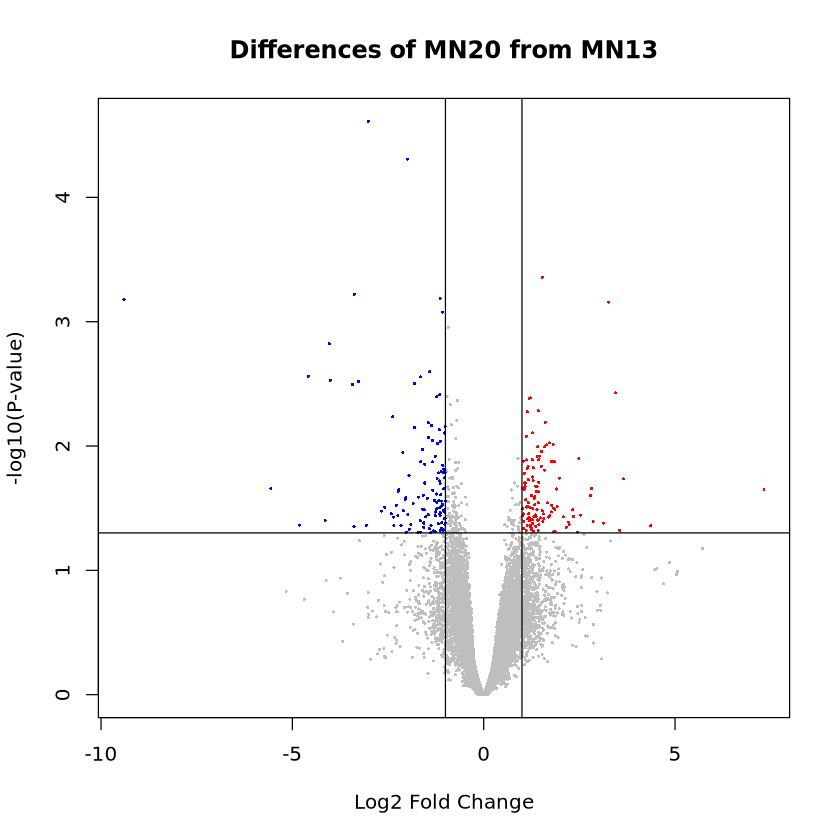

In [44]:
volcanoplot(fit, coef=2, style = "p-value", highlight = 0, name = fit$ID, col=DV$colors)
abline(h = -log10(0.05))
abline(v = 1)
abline(v = -1)
title("Differences of MN20 from MN13")
png("Differences of MN20 from MN13.png")
dev.off()

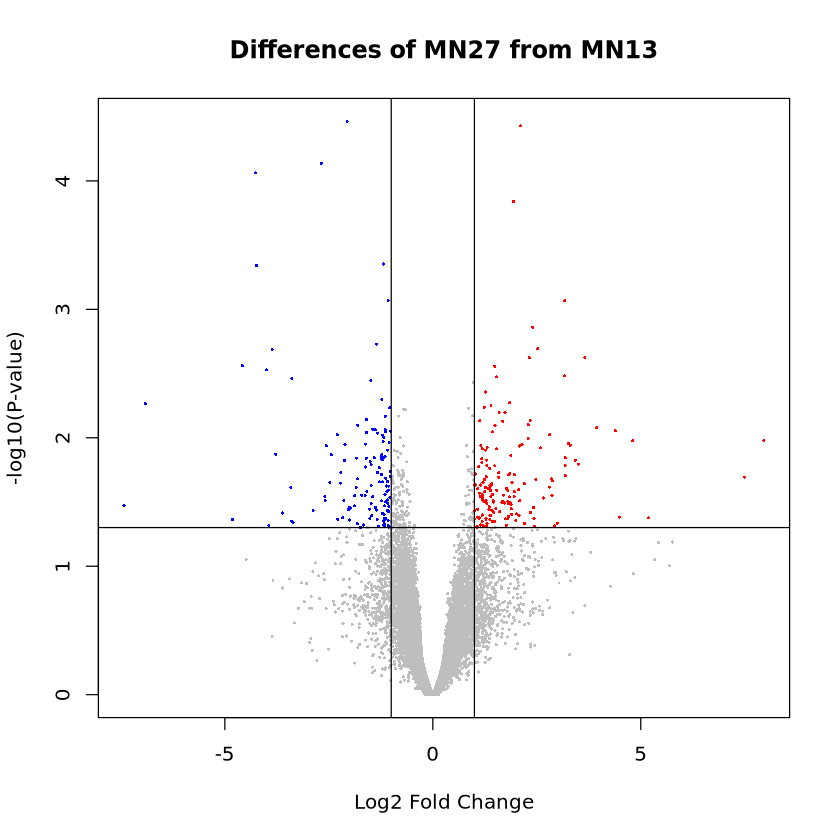

In [45]:
PV1 <- fit$p.value[,3]
CV1 <- fit$coefficients[,3]
DV1 <- data.frame(CV1, PV1)

DV1$colors <- ifelse(CV1 < -1 & -log10(PV1) > -log10(0.05), "blue", ifelse(CV1 > 1 & -log10(PV1) > -log10(0.05), "red", "gray"))

volcanoplot(fit, coef=3, style = "p-value", highlight = 0, name = fit$Gene, col=DV1$colors)
abline(h = -log10(0.05))
abline(v = 1)
abline(v = -1)
title("Differences of MN27 from MN13")

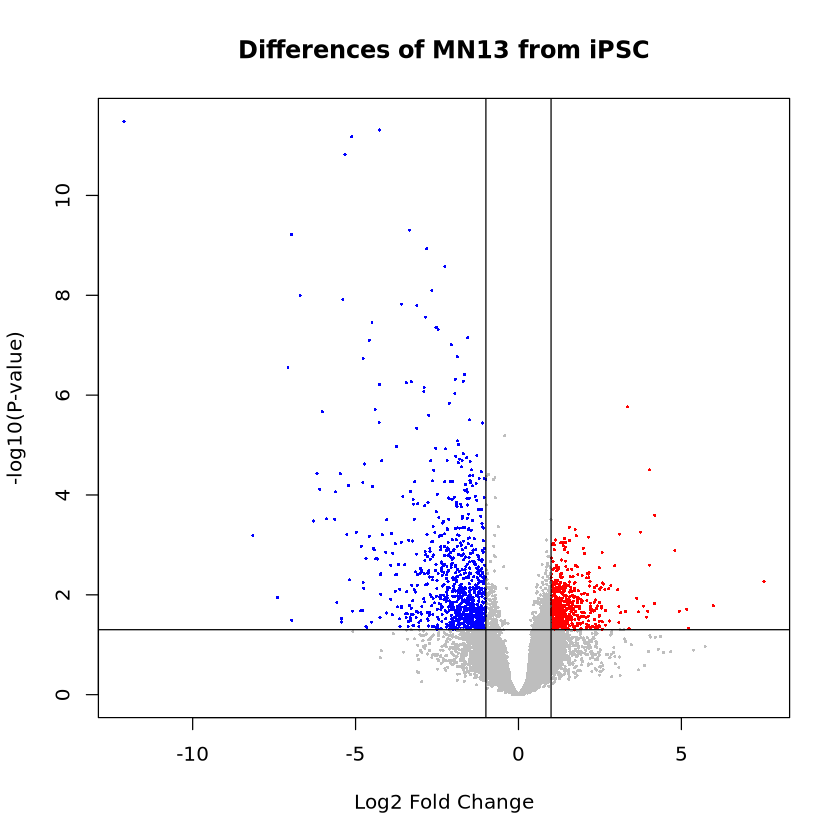

In [46]:
PV2 <- fit1$p.value[,2]
CV2 <- fit1$coefficients[,2]
DV2 <- data.frame(CV2, PV2)

DV2$colors <- ifelse(CV2 < -1 & -log10(PV2) > -log10(0.05), "blue", ifelse(CV2 > 1 & -log10(PV2) > -log10(0.05), "red", "gray"))

volcanoplot(fit1, coef=2, style = "p-value", highlight = 0, name = fit1$Gene, col=DV2$colors)
abline(h = -log10(0.05))
abline(v = 1)
abline(v = -1)
title("Differences of MN13 from iPSC")

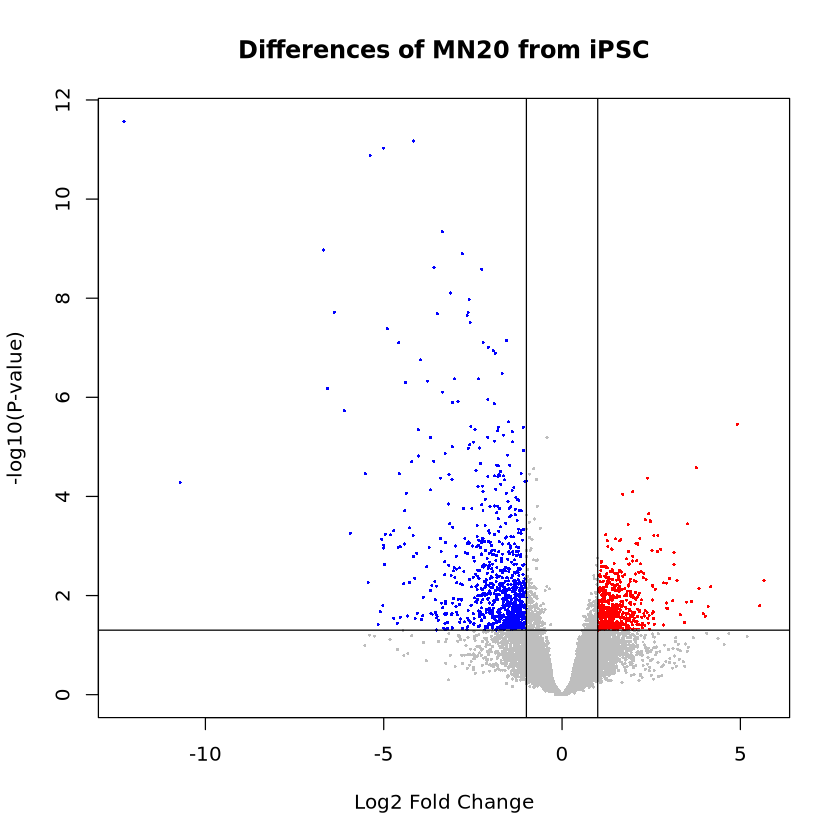

In [47]:
PV3 <- fit1$p.value[,3]
CV3 <- fit1$coefficients[,3]
DV3 <- data.frame(CV3, PV3)

DV3$colors <- ifelse(CV3 < -1 & -log10(PV3) > -log10(0.05), "blue", ifelse(CV3 > 1 & -log10(PV3) > -log10(0.05), "red", "gray"))

volcanoplot(fit1, coef=3, style = "p-value", highlight = 0, name = fit$Gene, col=DV3$colors)
abline(h = -log10(0.05))
abline(v = 1)
abline(v = -1)
title("Differences of MN20 from iPSC")

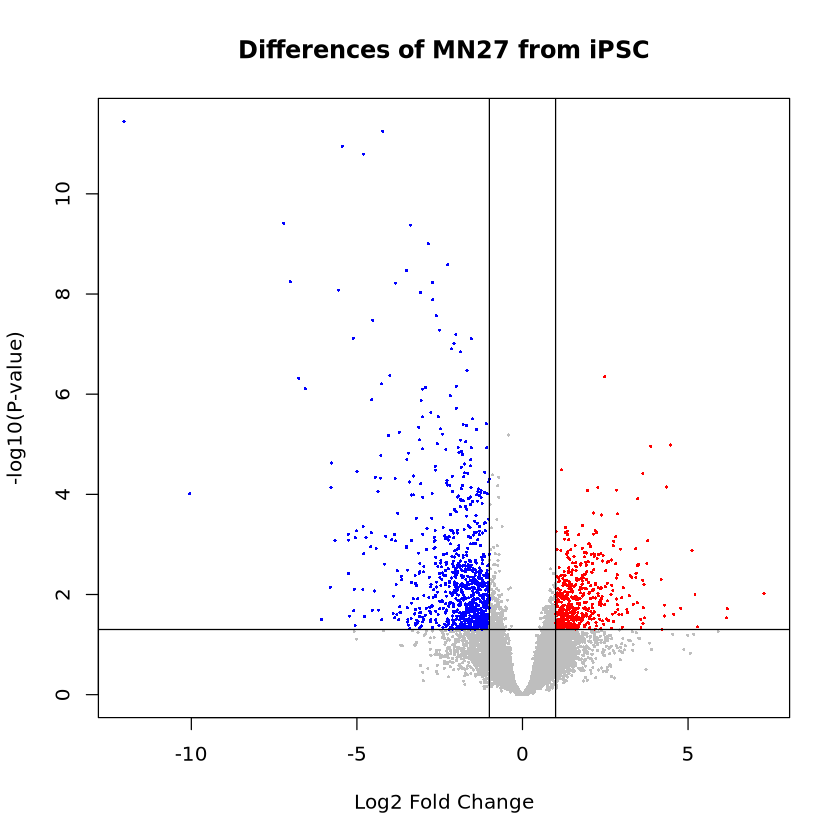

In [48]:
PV4 <- fit1$p.value[,4]
CV4 <- fit1$coefficients[,4]
DV4 <- data.frame(CV4, PV4)

DV4$colors <- ifelse(CV4 < -1 & -log10(PV4) > -log10(0.05), "blue", ifelse(CV4 > 1 & -log10(PV4) > -log10(0.05), "red", "gray"))

volcanoplot(fit1, coef=4, style = "p-value", highlight = 0, name = fit$Gene, col=DV4$colors)
abline(h = -log10(0.05))
abline(v = 1)
abline(v = -1)
title("Differences of MN27 from iPSC")

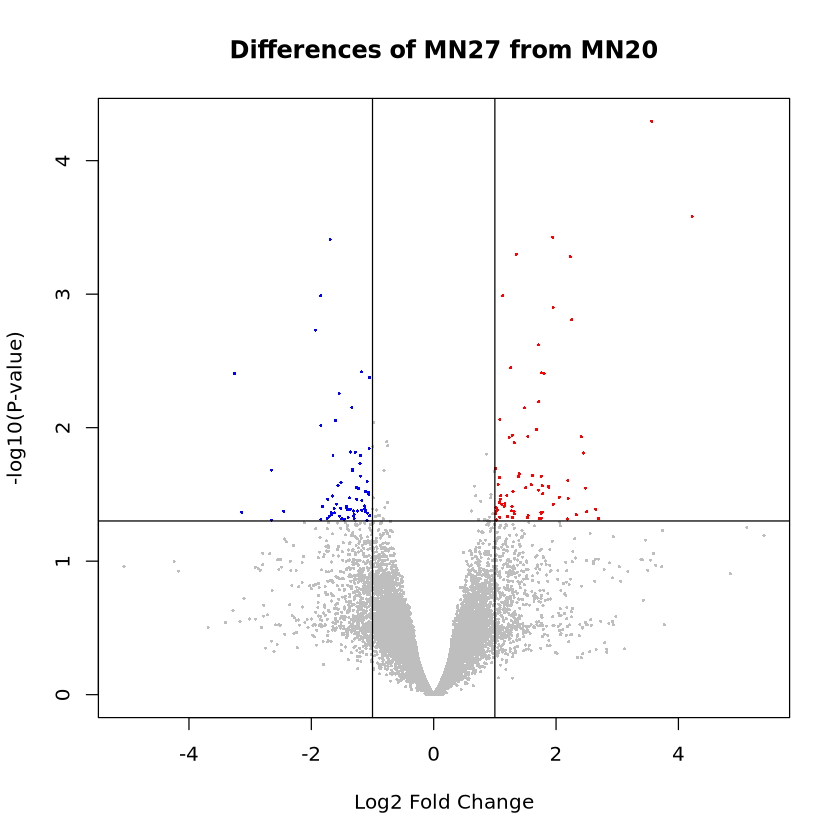

In [52]:
PV5 <- fit2$p.value[,2]
CV5 <- fit2$coefficients[,2]
DV5 <- data.frame(CV5, PV5)

DV5$colors <- ifelse(CV5 < -1 & -log10(PV5) > -log10(0.05), "blue", ifelse(CV5 > 1 & -log10(PV5) > -log10(0.05), "red", "gray"))

volcanoplot(fit2, coef=2, style = "p-value", highlight = 0, name = fit$Gene, col=DV5$colors)
abline(h = -log10(0.05))
abline(v = 1)
abline(v = -1)
title("Differences of MN27 from MN20")

In [53]:
topTable(fit, coef=2)

ERROR: Error: Trying to sort.by B, but B-statistic (lods) not found in MArrayLM object
